<a href="https://colab.research.google.com/github/sallape/AI-Public/blob/main/UnsupervisedKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# K- means

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Intellipaat/UnSupervisedLearning/Cricket.csv',encoding='latin1')

In [6]:
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
data[['start','end']]= data.Span.str.split('-',expand=True).astype(int)

In [8]:
data['Exp']=data['end'] - data['start']

In [9]:
data.drop(['start','end','Span'],axis=1,inplace=True)

In [10]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [11]:
data.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,Exp
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000,23.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 8.1+ KB


In [13]:
data.HS = data.HS.str.replace('*','')

In [14]:
data.HS = data.HS.astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [16]:
data1 = data.copy()

In [17]:
Players = data1.pop('Player')

In [18]:
data1.head(3)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17


In [19]:
Players.head(3)

,Player
0,SR Tendulkar (INDIA)
1,KC Sangakkara (Asia/ICC/SL)
2,RT Ponting (AUS/ICC)


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     79 non-null     int64  
 1   Inns    79 non-null     int64  
 2   NO      79 non-null     int64  
 3   Runs    79 non-null     int64  
 4   HS      79 non-null     int64  
 5   Ave     79 non-null     float64
 6   BF      79 non-null     int64  
 7   SR      79 non-null     float64
 8   100     79 non-null     int64  
 9   50      79 non-null     int64  
 10  0       79 non-null     int64  
 11  Exp     79 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 7.5 KB


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data1)

In [22]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [23]:
DF1 = pd.DataFrame(df_scaled,columns=data1.columns)

In [24]:
DF1.head(3)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900


In [25]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4)
cluster.fit(DF1)

KMeans(n_clusters=4)

In [26]:
cluster.labels_

array([3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [27]:
data.head(3)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17


In [28]:
data['clisterid'] = cluster.labels_
data.head(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,clisterid
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,3
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,3
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,3
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,3
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,3
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,1


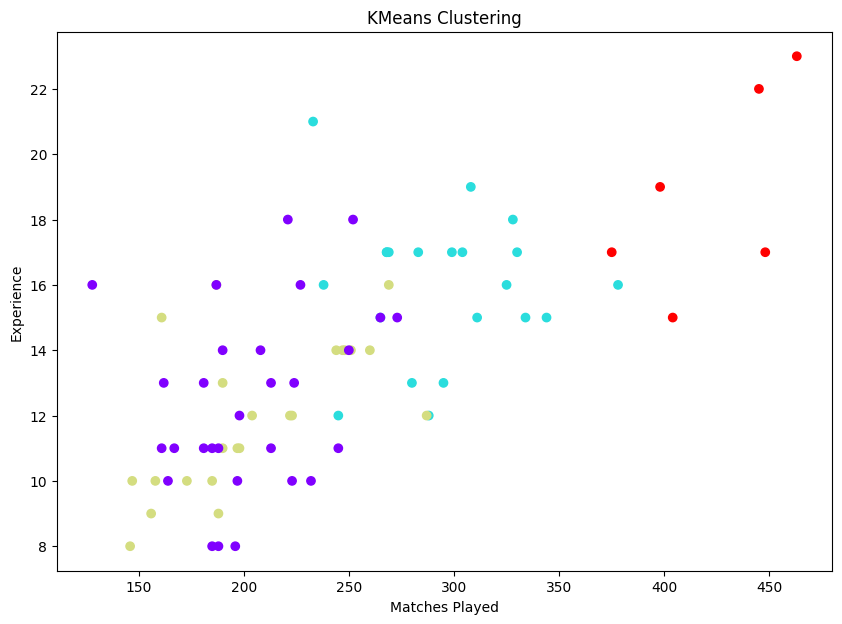

In [29]:
# prompt: create a scatter plot that will showcase how kmeans created the cluster id

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(data['Mat'], data['Exp'], c=data['clisterid'], cmap='rainbow')
plt.xlabel('Matches Played')
plt.ylabel('Experience')
plt.title('KMeans Clustering')
plt.show()

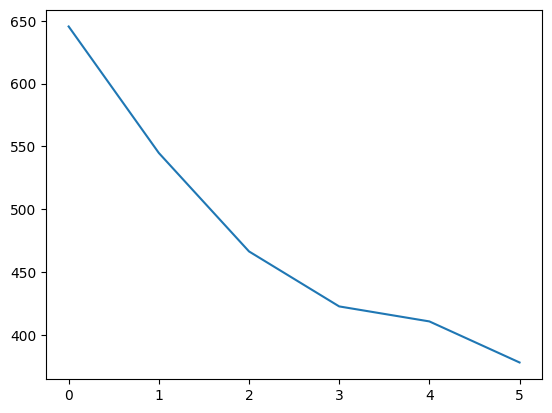

In [30]:
# elbow method

cluster1 = list(range(2,8))
ssd = []
for num_cluster in cluster1:
  model_clus = KMeans(n_clusters=num_cluster)
  model_clus.fit(DF1)
  ssd.append(model_clus.inertia_)
plt.plot(ssd)